<a href="https://colab.research.google.com/github/ImoPupato/ImoPupato/blob/main/Trabajo_Practico_Integrador_Grupo_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center> <h1>Trabajo Práctico Pre-Final</h1> </center>

<center> <h2>Análisis Quimioinformático de Datos</h2> </center>

En la celda que se encuentra a continuación vamos a importar e instalar todas las librerías que se van a usar.

Primero vamos a instalar todo el software RDKit y otras librerias que vamos a usar con el comando `!pip`. Luego le vamos a pedir que "tenga a mano" sólo las librerías que vamos a usar con el comando `import`.

❗ Para ejecutar los comandos tenemos que "correr la celda". Para hacerlo,  podés apretar el boton "Run" o usar el comando "Ctrl + Enter"

👇

In [ ]:
# Instalar las librerias
!pip install pandas rdkit tqdm useful_rdkit_utils seaborn scikit-posthocs chembl_downloader chembl_webresource_client xlsxwriter git+https://github.com/ikmckenz/adme-pred-py.git pubchempy

  Cloning https://github.com/ikmckenz/adme-pred-py.git to /tmp/pip-req-build-756qviy4
  Running command git clone --filter=blob:none --quiet https://github.com/ikmckenz/adme-pred-py.git /tmp/pip-req-build-756qviy4
  Resolved https://github.com/ikmckenz/adme-pred-py.git to commit 8091a02fe5998b8ba237760ade7ff3400abbbcdd
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.7/29.7 MB 47.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.2/55.2 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.0/153.0 kB 17.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.9/121.9 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.9/84.9 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 62.3 MB/s eta 0:

Ahora vamos a importar las librerias que vamos a usar

In [ ]:
# Importar las librerias con las que vamos a trabajar en este práctico
# Importar libreria para guardar archivos
import os

# Importar libreria para guardar trabajar con tablas
import pandas as pd
import numpy as np

# Importar las librerias de RDKit
from rdkit import Chem, DataStructs
from rdkit.Chem import Draw
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem import Descriptors
from rdkit.Chem import PandasTools
from rdkit.Chem.Fingerprints import FingerprintMols

# Importar las librerias para graficar
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

# Importar las librerias para graficar
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.gridspec as gridspec
import seaborn as sns

# Importar las funciones de 'scipy'
from scipy.cluster.hierarchy import dendrogram, linkage, is_valid_linkage, cut_tree

# Importar las funciones de 'sklearn'
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics

# Importar el módulo sys
import sys
np.set_printoptions(threshold=sys.maxsize)

# Importar libreria de ChEMBL
from chembl_webresource_client.new_client import new_client

# Importar libreria de PubChem
import pubchempy as pcp

# Importar libreria de ADME
from adme_pred import ADME

# Importar libreria para ver una barra con el progreso de cada comando
from tqdm.auto import tqdm
tqdm.pandas()

# Importar las funciones de 'scipy'
from scipy.cluster.hierarchy import dendrogram, linkage, is_valid_linkage, cut_tree

# Importar el módulo de advertencias
import warnings

import time

# Introducción

En el campo de la quimioinformática, el estudio de las propiedades TPSA (Área de Superficie Polar Total) y LogP (Logaritmo del Coeficiente de Partición Octanol-Agua) ha demostrado ser crucial en la evaluación y predicción de las características y comportamientos de los compuestos químicos.

El **TPSA** es una medida que estima la superficie total de un compuesto que es polar y, por lo tanto, capaz de formar enlaces de hidrógeno con su entorno.

Esta propiedad es importante ya que influye en:
* la solubilidad de los compuestos
* la biodisponibilidad de los compuestos
* la capacidad del compuesto para interactuar con proteínas y otros receptores biológicos

Un **mayor TPSA** puede indicar una **mayor probabilidad de interacciones** con la superficie de una célula, lo que puede afectar la absorción y distribución de un compuesto en el organismo.

El **LogP** es un parámetro que describe la hidrofobicidad de una molécula, es decir, su afinidad por las sustancias lipídicas o grasas en comparación con el agua.

Este coeficiente de partición octanol-agua se utiliza ampliamente para evaluar la capacidad de una molécula para atravesar las membranas biológicas, incluida la barrera hematoencefálica.

La **barrera hematoencefálica (BBB)** es una estructura altamente selectiva que protege el cerebro al limitar el paso de sustancias y compuestos tóxicos desde el torrente sanguíneo hacia el cerebro. La capacidad de un compuesto para atravesar la BBB es crucial en el diseño de fármacos para el tratamiento de enfermedades del sistema nervioso central, ya que un bajo índice de permeabilidad puede impedir que el compuesto alcance su objetivo terapéutico en el cerebro.

La **absorción intestinal humana (HIA)** es una propiedad farmacocinética importante a considerar en el desarrollo de fármacos orales. La HIA se refiere a la capacidad de un compuesto para pasar a través de la barrera intestinal y entrar en la circulación sistémica. Una buena absorción intestinal es esencial para que un fármaco sea efectivo en el tratamiento de enfermedades sistémicas.

El **objetivo general** de este trabajo es identificar correlaciones y tendencias que permitan comprender mejor la relación entre estas propiedades moleculares y la farmacocinética de los compuestos.

Para lograr este objetivo se explorarán cómo las propiedades moleculares, el TPSA y el LogP, se relacionan con la HIA y la permeación de la BBB. Se analizará cómo las variaciones en el TPSA y el LogP pueden influir en la capacidad de un compuesto para ser absorbido a nivel intestinal y atravesar la barrera hematoencefálica.

Tendrán acceso a tres conjuntos de datos:
* **Set de Datos 1:** Lista de moléculas con una buena absorción intestinal humana (HIA) conocida,
* **Set de Datos 2:** Lista de moléculas con permeación conocida a través de la barrera hematoencefálica (BBB),
* **Set de Datos 3:** Lista de moléculas aprobadas por la Administración de Alimentos y Medicamentos (FDA) con evidencia experimental de HIA y BBB.

Los primeros dos conjuntos de datos se utilizarán para definir el rango de parámetros en el cual los compuestos exhiben una buena HIA y permeación de la BBB. Al analizar las propiedades TPSA y LogP de las moléculas en los conjuntos de datos de HIA conocida y BBB conocida, podrás establecer umbrales y rangos específicos que se correlacionen con estas características deseadas. Esto permitirá identificar las propiedades moleculares óptimas que favorecen una buena HIA y permeación de la BBB.

Una vez que se hayan definido estos rangos de parámetros, el tercer conjunto de datos, se utilizará para validar la estrategia. Al aplicar los umbrales y rangos previamente definidos a este conjunto de datos, podrás evaluar si las propiedades TPSA y LogP de estas moléculas corresponden con la evidencia experimental. Si los resultados concuerdan con las expectativas, esto proporcionará evidencia de la eficacia de la estrategia en la identificación de compuestos con una buena HIA y permeación de la BBB.



# Consignas:
1. Abrir las tablas:
  * Datos Human Intestinal Absorption (HIA): https://drive.google.com/file/d/12JEfIljakj8OHiQLlrdCUF1M83wyVpRP/view?usp=drive_link
  * Datos Blood–Brain Barrier permeation (BBB): https://drive.google.com/file/d/1zUU-xR2895UbFISX8TD9F3kbRMuCPU1S/view?usp=drive_link

Para cada set de datos:
2. Calcular TPSA y LogP
3. Hacer un gráfico en dos dimensiones, donde el eje x es TPSA y el eje y es LogP, diferenciando los datos positivos de los negativos en distintos colores
4. Armar un nuevo set de datos que sólo tenga los valores positivos de HIA y BBB. Agregarle una columnas que indique de que tabla viene el dato
5. Hacer un nuevo gráfico en dos dimensiones, donde el eje x es TPSA y el eje y es LogP para los datos de la tabla nueva
6. Determinar en que rango de TPSA y LogP una molécula tiene mayor probabilidad de ser HIA y en cuales BBB
7. Abrir la tabla de validación:
  * Datos de validación FDA: https://drive.google.com/file/d/1ppYTbDPCj7SkugEr8MojH-m_nIo7Im0S/view?usp=drive_link
8. Calcular TPSA y LogP
9. Usar los rangos determinados en el punto 6 para predecir en cada molécula de la tabla de FDA validation si va a tener HIA, BBB o ninguna.
10. Comparar los resultados de la predicción con el dato teórico que trae la tabla.
11. Hacer un gráfico en dos dimensiones, donde el eje x es TPSA y el eje y es LogP de las moléculas de FDA. Diferenciar con tres colores las tres condiciones posibles: HIA, BBB o ninguna
12. Clusterizar usando PCA con TPSA y LogP
13. Comparar el clusterizado con lo observado en punto 6
14. Evaluar el modelo
15. Armar un texto como cierre del trabajo que contenga:
  *  Introducción
  *  Hipótesis
  *  Objetivos
  *  Metodología
  *  Resultados
  *  Conclusión

A trabajar!

In [ ]:
# Cargar el contenido de drive
from google.colab import drive
drive.mount('/content/drive')

# Indicar la carpeta de trabajo
path = '/content/drive/MyDrive/Quimioinf'
os.chdir(path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Generar una variable con el nombre de la tabla que contiene la lista de moléculas
HIA = pd.read_csv('HIA.csv')

In [ ]:
#Generar una variable con el nombre de la tabla que contiene la lista de moléculas
moleculas_HIA = pd.read_csv('HIA.csv')

#Agregar el formato molécula de RDKit para cada smiles
PandasTools.AddMoleculeColumnToFrame(moleculas_HIA, smilesCol='SMILES')

#Mostrar la tabla
moleculas_HIA

In [ ]:
# Cargar el contenido de drive
from google.colab import drive
drive.mount('/content/drive')

# Indicar la carpeta de trabajo
path = '/content/drive/MyDrive/Quimioinf'
os.chdir(path)

BBB = pd.read_csv('BBB.csv')

In [ ]:
#Generar una variable con el nombre de la tabla que contiene la lista de moléculas
moleculas_BBB = pd.read_csv('BBB.csv')

#Agregar el formato molécula de RDKit para cada smiles
PandasTools.AddMoleculeColumnToFrame(moleculas_BBB, smilesCol='SMILES')

#Mostrar la tabla
moleculas_BBB

2. Calcular TPSA y LogP


In [ ]:
ef descriptors(df):
    # Desactivar las advertencias de asignación encadenada en pandas
    pd.options.mode.chained_assignment = None

    # Crear listas vacías para almacenar los descriptores
    LogP_list = []
    TPSA_list=[]

    # Calcular los descriptores para cada molécula en la columna 'ROMol'
    for element in df['ROMol']:
        try:
            # Calcular el logP
            LogP = Descriptors.MolLogP(element)
            LogP_list.append(LogP)
        except:
            LogP_list.append('N/A')  # Si ocurre una excepción, agregar 'N/A' a la lista
            pass

        try:
            # Calcular el TPSA
            TPSA = Chem.QED.properties(element).PSA
            TPSA_list.append(TPSA)
        except:
            TPSA_list.append('N/A')  # Si ocurre una excepción, agregar 'N/A' a la lista
            pass
    # Agregar las listas de descriptores al DataFrame
    df['logP'] = LogP_list
    df['TPSA'] = TPSA_list
    return df

In [ ]:
# Llamar a la función decriptors pasando el DataFrame moleculas_HIA_modif como argumento
moleculas_HIA_modif = descriptors(moleculas_HIA)
moleculas_HIA_modif

In [ ]:
moleculas_BBB_modif = descriptors(moleculas_BBB)
moleculas_BBB_modif

3. Hacer un gráfico en dos dimensiones, donde el eje x es TPSA y el eje y es LogP, diferenciando los datos positivos de los negativos en distintos colores


In [ ]:
import seaborn as sns
sns.scatterplot(x='TPSA', y='logP', hue="HIA", data= moleculas_HIA_modif, palette=["r", "g"])
plt.xlabel('TPSA')
plt.ylabel('LogP')
plt.title('TPSA vs LogP')
plt.show()

In [ ]:
moleculas_HIA_modif


In [ ]:
moleculas_HIA_modif["Tipo de dato"]="HIA"
moleculas_BBB_modif["Tipo de dato"]="BBB"

In [ ]:
moleculas_BBB_modif_limpia=moleculas_BBB_modif
moleculas_HIA_modif_limpia=moleculas_HIA_modif

In [ ]:
moleculas_BBB_modif_limpia["Cumple"]=0
for i in range(len(moleculas_BBB_modif_limpia)):
  if moleculas_BBB_modif_limpia['BBB'][i]=='+':
     moleculas_BBB_modif_limpia["Cumple"][i]=True
  else:moleculas_BBB_modif_limpia["Cumple"][i]=False
BBB_limpia=(moleculas_BBB_modif_limpia[(moleculas_BBB_modif_limpia.Cumple==True)])
BBB_limpia=moleculas_BBB_modif_limpia.reset_index()

In [ ]:
BBB_limpia = (BBB_limpia[(BBB_limpia.Cumple==True)])
BBB_limpia = BBB_limpia.reset_index()


In [ ]:
BBB_limpia

In [ ]:
moleculas_HIA_modif_limpia["Cumple"]=0
for i in range(len(moleculas_HIA_modif_limpia)):
  if moleculas_HIA_modif_limpia['HIA'][i]=='+':
     moleculas_HIA_modif_limpia["Cumple"][i]=True
  else:moleculas_HIA_modif_limpia["Cumple"][i]=False
HIA_limpia=(moleculas_HIA_modif_limpia[(moleculas_HIA_modif_limpia.Cumple==True)])
HIA_limpia=moleculas_HIA_modif_limpia.reset_index()

In [ ]:
HIA_BBB=pd.concat([HIA_limpia,BBB_limpia])
HIA_BBB

4. Hacer un nuevo gráfico en dos dimensiones, donde el eje x es TPSA y el eje y es LogP para los datos de la tabla nueva

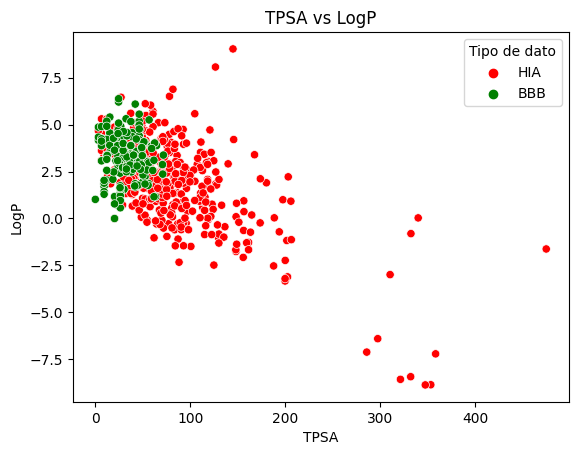

In [ ]:
import seaborn as sns
sns.scatterplot(x='TPSA', y='logP', hue="Tipo de dato", data= HIA_BBB, palette=["r", "g"])
plt.xlabel('TPSA')
plt.ylabel('LogP')
plt.title('TPSA vs LogP')
plt.show()


6. Determinar en que rango de TPSA y LogP una molécula tiene mayor probabilidad de ser HIA y en cuales BBB

In [ ]:
#TPS<90
#0<logP<7.5

In [ ]:
# Agregar una nueva columna llamada 'lipinski' al DataFrame y asignarle un valor inicial de 0
moleculas_HIA['lipinski'] = 0

In [ ]:
# Crear un histograma de las columnas 'logP', 'TPSA' de la moleculas_HIA_modif
moleculas_HIA_modif[['logP', 'TPSA']].hist(
    bins=15,
    figsize=(10, 8),
    rwidth=0.9,
    sharey=True
)
plt.rcParams['axes.axisbelow']=True

# Guardar el gráfico como un archivo JPG
plt.savefig("plt_histogramas.jpg")

# Mostrar el gráfico en la salida
plt.show()
